In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
home = '/home/anibal/'
sys.path.append(home + '/roman_rubin/fit_codes')

import re
from pyLIMA import telescopes
from pyLIMA.models import PSBL_model
from pyLIMA.outputs import pyLIMA_plots
from pyLIMA import event
from tqdm.auto import tqdm
from fit_results import chi_dof, best_model, errors,best_full_model
from filter_curves import filtros, read_curves

path_model = '/home/anibal/files_db/filtered_curves/'
files = os.listdir(path_model)

In [2]:
def find_closest_values_to_x0(x, y, x0, n):
    # Calculate the absolute differences between x0 and each value in x
    differences_to_x0 = [abs(x_value - x0) for x_value in x]
    
    # Sort indices of x based on differences to x0
    sorted_indices = sorted(range(len(x)), key=lambda i: differences_to_x0[i])
    
    # Take the first n indices from the sorted list
    closest_indices = sorted_indices[:n]
    
    # Find the index with the minimum y value among the closest indices
    min_y_index = min(closest_indices, key=lambda i: y[i])
    
    # The value in x corresponding to the index with the minimum y value is the result
    closest_x_value = x[min_y_index]
    
    return min_y_index#closest_x_value


In [3]:
data_w = []
data_u = []
data_g = []
data_r = []
data_i = []
data_z = []
data_y = []
for i in tqdm(range(0,1000)):
    curves,param=read_curves(path_model+files[i])

    for key in curves:
        if not len(curves[key])==0:
            if key == 'w':
                # plt.axvline(param['t0'])
                x0 = find_closest_values_to_x0(curves[key][:,0],curves[key][:,1],param['t0'],1000)
                data_w.append([len(curves[key][:,0]), curves[key][x0,1]])
            elif key == 'u':
                # plt.axvline(param['t0'])
                x0 = find_closest_values_to_x0(curves[key][:,0],curves[key][:,1],param['t0'],10)
                data_g.append([len(curves[key][:,0]), curves[key][x0,1]])
            elif key == 'g':
                # plt.axvline(param['t0'])
                x0 = find_closest_values_to_x0(curves[key][:,0],curves[key][:,1],param['t0'],10)
                data_r.append([len(curves[key][:,0]), curves[key][x0,1]])
            elif key == 'r':
                # plt.axvline(param['t0'])
                x0 = find_closest_values_to_x0(curves[key][:,0],curves[key][:,1],param['t0'],10)
                data_i.append([len(curves[key][:,0]), curves[key][x0,1]])
            elif key == 'i':
                # plt.axvline(param['t0'])
                x0 = find_closest_values_to_x0(curves[key][:,0],curves[key][:,1],param['t0'],10)
                data_u.append([len(curves[key][:,0]), curves[key][x0,1]])
            elif key == 'z':
                # plt.axvline(param['t0'])
                x0 = find_closest_values_to_x0(curves[key][:,0],curves[key][:,1],param['t0'],10)
                data_z.append([len(curves[key][:,0]), curves[key][x0,1]])
            elif key == 'y':
                # plt.axvline(param['t0'])
                x0 = find_closest_values_to_x0(curves[key][:,0],curves[key][:,1],param['t0'],10)
                data_y.append([len(curves[key][:,0]), curves[key][x0,1]])


  0%|          | 0/1000 [00:00<?, ?it/s]

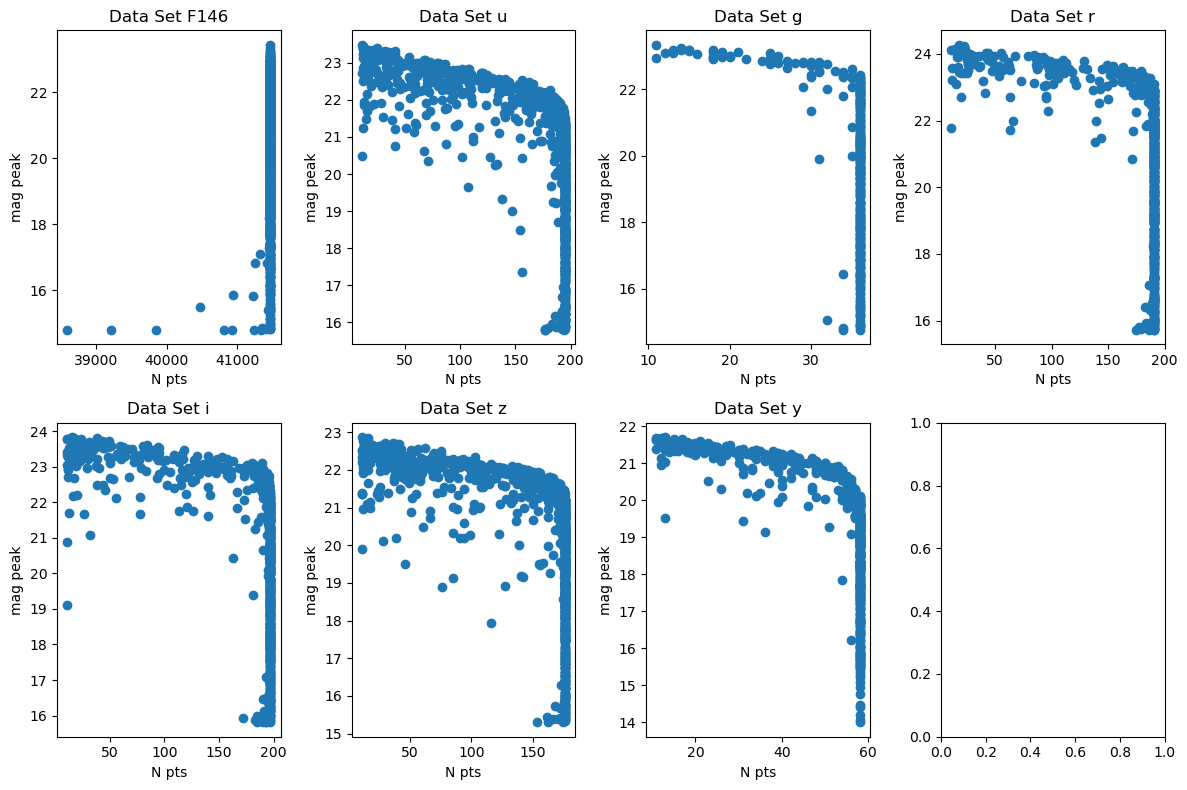

In [4]:
# List of data sets
data_sets = [data_w, data_u, data_g, data_r, data_i, data_z, data_y]

# Create a subplot grid
num_plots = len(data_sets)
num_rows = 2  # Number of rows in the subplot grid
num_cols = (num_plots + 1) // num_rows  # Calculate the number of columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()
fil = ['F146','u','g','r','i','z','y']
for idx, data in enumerate(data_sets):
    ax = axes[idx]
    x_values = np.array(data)[:, 0]
    y_values = np.array(data)[:, 1]
    ax.plot(x_values, y_values, marker='o', linestyle=' ')
    ax.set_title(f'Data Set {fil[idx]}')
    ax.set_xlabel('N pts')
    ax.set_ylabel('mag peak')
# Adjust layout
plt.tight_layout()
plt.show()


 count the numbers of points in  $t_0 \pm t_E$

In [5]:
path_model = '/home/anibal/files_db/filtered_curves/'
files = os.listdir(path_model)

for i in tqdm(range(0,1)):
    N = []
    curves,param=read_curves(path_model+files[i])
    for key in curves:
        N.append(len(curves[key]))
    
print(N)

  0%|          | 0/1 [00:00<?, ?it/s]

[41472, 0, 0, 16, 86, 106, 34]


In [6]:
N = []
T0 = []
TE = []
for j in tqdm(range(1000)):
    curves,param = read_curves(path_model+files[j])
    t0=param['t0']
    tE=param['te']
    # print(tE)
    n = []
    for key in curves:
        if not len(curves[key])==0:
            for i in range(len(curves[key][:,0])):
                if t0-tE<curves[key][:,0][i]<t0+tE:
                    n.append(1)
    N.append(sum(n))
    T0.append(t0)
    TE.append(tE)


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/anibal/anaconda3/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Text(0, 0.5, '$N_{pts}$')

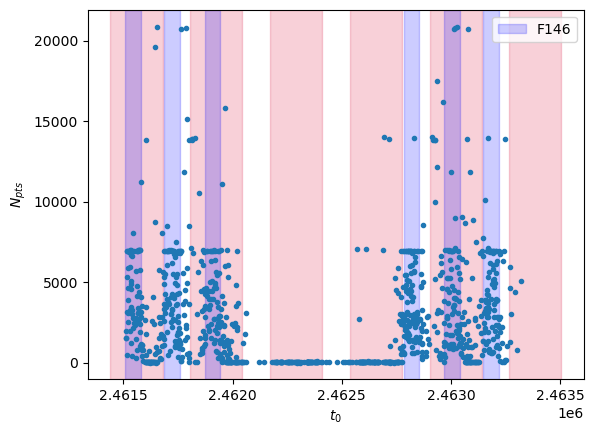

In [11]:
from astropy.time import Time

# %matplotlib widget
plt.close('all')
plt.plot(T0,N,marker='.',linestyle='')

given_jd = 2460413.7638286077
tstart_Roman = given_jd +3*365
Roman1 = [tstart_Roman,tstart_Roman+72]
Roman2 = [tstart_Roman+107+72,tstart_Roman+107+72*2]
Roman3 = [tstart_Roman+107+72*2+113, tstart_Roman+107+72*3+113]
Roman4 = [tstart_Roman+107+72*3+113+838.36, tstart_Roman+107+72*4+113+838.36]
Roman5 = [tstart_Roman+107+72*4+113*2+838.36,tstart_Roman+107+72*5+113*2+838.36]
Roman6 = [tstart_Roman+107+72*4+113*2+838.36+72+107,tstart_Roman+107+72*4+113*2+838.36+72+107+72]
rubin_seasons = []
for n in range(2,8):
    # oct1 = Time(given_jd+171+365*n, format='jd')
    # oct1.fits
    # feb5 = Time(given_jd+171+127+365*n, format='jd')
    # feb5.fits
    oct1 = Time(given_jd+171+365*(n+1), format='jd')
    oct1.fits
    feb5 = Time(given_jd+171+127+365*n, format='jd')
    feb5.fits
    # plt.axvspan(oct1.value,feb5.value,alpha=0.2,color='crimson')
    plt.axvspan(feb5.value,oct1.value,alpha=0.2,color='crimson')
    rubin_seasons.append((feb5.value,oct1.value))

plt.axvspan(Roman1[0],Roman1[1],alpha=0.2,color='blue')
plt.axvspan(Roman2[0],Roman2[1],alpha=0.2,color='blue')
plt.axvspan(Roman3[0],Roman3[1],alpha=0.2,color='blue')
plt.axvspan(Roman4[0],Roman4[1],alpha=0.2,color='blue')
plt.axvspan(Roman5[0],Roman5[1],alpha=0.2,color='blue')
plt.axvspan(Roman6[0],Roman6[1],alpha=0.2,color='blue',label = 'F146')

plt.legend(loc='best')
plt.xlabel(r'$t_0$')
plt.ylabel(r'$N_{pts}$')

## Defining categories of events

* A: $t_0\pm t_E$ is in a gap of Roman and Rubin
* B: $t_0\pm t_E$ is in a gap of Roman but not of Rubin
* C: $t_0\pm t_E$ is in a gap of Rubin but not of Roman
* D: $t_0\pm t_E$ is in the overlap of a season of Roman and Rubin


In [12]:
given_jd = 2460413.7638286077
tstart_Roman = given_jd +3*365
roman_seasons = [(tstart_Roman,tstart_Roman+72), (tstart_Roman+107+72,tstart_Roman+107+72*2),
                (tstart_Roman+107+72*2+113, tstart_Roman+107+72*3+113), 
                (tstart_Roman+107+72*3+113+838.36, tstart_Roman+107+72*4+113+838.36),
                (tstart_Roman+107+72*4+113*2+838.36,tstart_Roman+107+72*5+113*2+838.36),
                (tstart_Roman+107+72*4+113*2+838.36+72+107,tstart_Roman+107+72*4+113*2+838.36+72+107+72)]



In [13]:
curves,param = read_curves(path_model+files[5])
t0 = param['t0']
tE = param['te']
number = t0
sigma = tE

in_rubin_season = False
for start, stop in rubin_seasons:
    if start <= number-sigma <= stop or start <= number+sigma <= stop:
        print ('Rubin season',start, stop)
        in_rubin_season = True

in_roman_season = False
for start, stop in roman_seasons:
    if start <= number-sigma <= stop or start <= number+sigma <= stop:
        print('Roman season',start, stop)
        in_roman_season = True

if in_rubin_season and in_roman_season:
    print('cat D')
    cat = 'D'
if not in_rubin_season and not in_roman_season:
    print('cat A')
    cat = 'A'
if in_rubin_season and not in_roman_season:
    print('cat B')
    cat= 'B'
if not in_rubin_season and in_roman_season:
    print('cat C')
    cat = 'C'

Rubin season 2461806.7638286077 2462044.7638286077
Roman season 2461687.7638286077 2461759.7638286077
cat D


In [14]:
# param

In [15]:
categories = pd.DataFrame(columns=['source', 't0','tE','cat'])
    
for j in tqdm(range(len(files))):
    curves,param = read_curves(path_model+files[j])
    t0 = param['t0']
    tE = param['te']
    source = param['Source']
    number = t0
    sigma = tE

    in_rubin_season = False
    for start, stop in rubin_seasons:
        if start <= number-sigma <= stop or start <= number+sigma <= stop:
            # print ('Rubin season',start, stop)
            in_rubin_season = True

    in_roman_season = False
    for start, stop in roman_seasons:
        if start <= number-sigma <= stop or start <= number+sigma <= stop:
            # print('Roman season',start, stop)
            in_roman_season = True

    if in_rubin_season and in_roman_season:
        # print('cat D')
        cat = 'D'
    if not in_rubin_season and not in_roman_season:
        # print('cat A')
        cat = 'A'
    if in_rubin_season and not in_roman_season:
        # print('cat B')
        cat= 'B'
    if not in_rubin_season and in_roman_season:
        # print('cat C')
        cat = 'C'
    
    categories.loc[len(categories)] = [source, t0, tE, cat]
    
## Defining categories of events

# * A: $t_0\pm t_E$ is in a gap of Roman and Rubin
# * B: $t_0\pm t_E$ is in a gap of Roman but not of Rubin
# * C: $t_0\pm t_E$ is in a gap of Rubin but not of Roman
# * D: $t_0\pm t_E$ is in the overlap of a season of Roman and Rubin


  0%|          | 0/1911 [00:00<?, ?it/s]

In [17]:
path_ephemerides = '/home/anibal/files_db/james_webb.txt' #PATH TO EPHEMERIDES
path_model = '/home/anibal/files_db/filtered_curves/'
path_fits = '/home/anibal/files_db/less_boundaries/'

models = os.listdir(path_model)
files_fits = os.listdir(path_fits)

files_roman = [f for f in files_fits if 'Roman' in f]
files_rr = [f for f in files_fits if not 'Roman' in f]

n_rom = [] # list with the event number
for j in files_roman:
    number = int(re.findall(r'\d+', j)[0])
    n_rom.append(number)

n_rr = [] # # list with the event number
for j in files_rr:
    number = int(re.findall(r'\d+', j)[0])
    n_rr.append(number)

# Convert lists to sets
set1 = set(n_rom)
set2 = set(n_rr)
# Find the common elements using intersection
common_elements = set1.intersection(set2)
# Convert the result back to a list (if needed)
common_elements_list = list(common_elements)
print(len(common_elements_list))




923


In [18]:
catA = list(map(int, categories['source'][categories['cat']=='A'].values))
catB = list(map(int, categories['source'][categories['cat']=='B'].values))
catC = list(map(int, categories['source'][categories['cat']=='C'].values))
catD = list(map(int, categories['source'][categories['cat']=='D'].values))

In [19]:
# Convert lists to sets
set_fits = set(common_elements_list)
setA = set(catA)
category_A = list(set_fits.intersection(setA))
print(len(category_A))

setB = set(catB)
category_B = list(set_fits.intersection(setB))
print(len(category_B))

setC = set(catC)
category_C = list(set_fits.intersection(setC))
print(len(category_C))

setD = set(catD)
category_D = list(set_fits.intersection(setD))
print(len(category_D))


14
323
187
399


In [20]:
df_cat = pd.DataFrame(columns=['source','cat', 't0','u0','te','s','q','alpha','piEE','piEN',
                               't0_true','u0_true','te_true','s_true','q_true','alpha_true','piEE_true','piEN_true'])
# df_true = pd.DataFrame(columns=['source','cat','t0','u0','te','s','q','alpha','piEE','piEN'])

k=0
for cats in (category_B,category_C):
    for e in tqdm(cats):
        curves,param = read_curves(path_model+f'Event_{int(e)}.txt')
        t0 = param['t0']
        tE = param['te']
        u0 = param['u0']
        s = param['s']
        q = param['q']
        alpha = param['alpha']
        piEE = param['piEE']
        piEN = param['piEN']
        source = param['Source']
        
        
        roman_file, rr_file = f'Event_Roman_{int(e)}_trf.npy',f'Event_RR_{int(e)}_trf.npy'
        # source = int(e)
        q_sigma_rr = errors(path_fits+rr_file)[0:8]
        q_sigma_roman = errors(path_fits+roman_file)[0:8]
        if k ==0:
            # df_true.loc[len(df_true)] = [t0, u0, tE, s,q,alpha,piEE,piEN]
            S = [source]+['B']+list(abs(q_sigma_roman-q_sigma_rr)/q_sigma_roman)
            df_cat.loc[len(df_cat)] = S+[t0, u0, tE, s,q,alpha,piEE,piEN]
        elif k==1:
            # df_true.loc[len(df_true)] = [source, 'C' ,t0, u0, tE, s,q,alpha,piEE,piEN]
            S = [source]+['C']+list(abs(q_sigma_roman-q_sigma_rr)/q_sigma_roman)
            df_cat.loc[len(df_cat)] = S+[t0, u0, tE, s,q,alpha,piEE,piEN]
    k=k+1

  0%|          | 0/323 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

/tmp/ipykernel_16029/1233304944.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


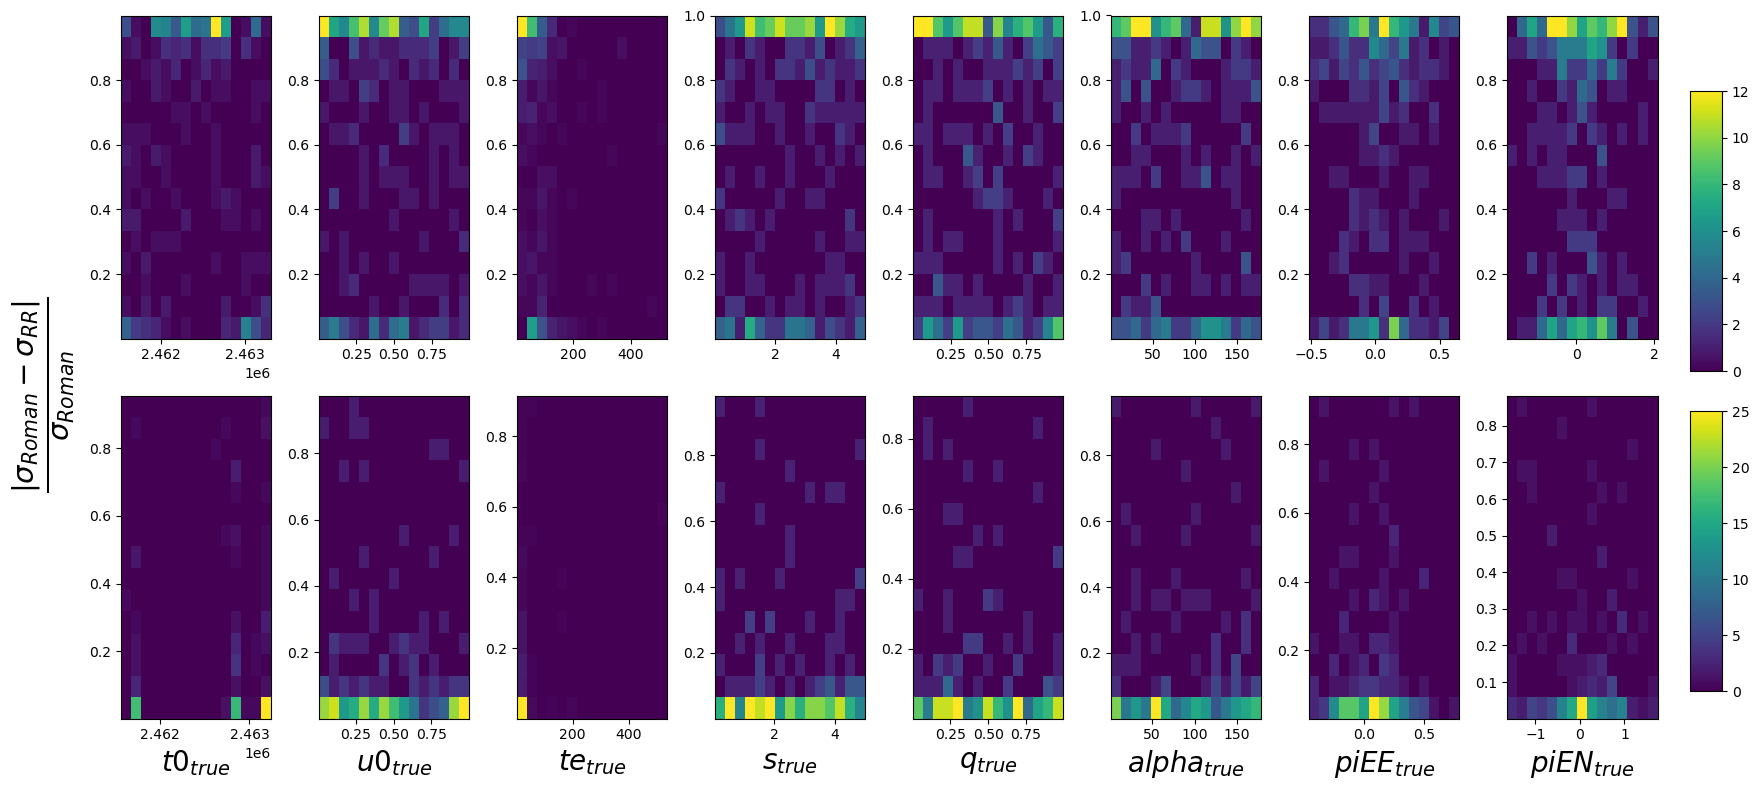

In [21]:
import matplotlib.pyplot as plt

properties = ('t0', 'u0', 'te', 's', 'q', 'alpha', 'piEE', 'piEN')

fig, axs = plt.subplots(2, 8, figsize=(16, 8))
cbar_axs = [fig.add_axes([1.01, 0.53, 0.02, 0.35]),  # Color bar for the first row
            fig.add_axes([1.01, 0.13, 0.02, 0.35])]  # Color bar for the second row

for row in range(2):
    for col, p in enumerate(properties):
        if row == 0:
            y = df_cat[p][df_cat[p]<1][df_cat['cat']=='B'].values
            x = df_cat[p+'_true'][df_cat[p]<1][df_cat['cat']=='B'].values
            im = axs[row, col].hist2d(x, y, bins=15)
        elif row == 1:
            y = df_cat[p][df_cat[p]<1][df_cat['cat']=='C'].values
            x = df_cat[p+'_true'][df_cat[p]<1][df_cat['cat']=='C'].values
            im = axs[row, col].hist2d(x, y, bins=15)
            axs[row, col].set_xlabel(r'$'+f'{p}'+'_{true}$', fontsize=20)
    
    if row == 0:
        fig.colorbar(im[3], cax=cbar_axs[row])
    else:
        fig.colorbar(im[3], cax=cbar_axs[row])#, label=r'$\frac{|\sigma_{Roman} - \sigma_{RR} |}{\sigma_{Roman}}$')
fig.text(-0.04, 0.5, r'$\frac{|\sigma_{Roman} - \sigma_{RR} |}{\sigma_{Roman}}$', va='center', rotation='vertical', fontsize=30)
plt.tight_layout()
plt.show()
